# Springs pendulums
### Kirill Zakharov

In [2]:
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')
%matplotlib inline

In [58]:
def runge_Kutt(functions, t0, initial, parameters, h, b):
    variables = [initial]
    arrayT = [t0]
    
    while arrayT[-1]<b:
        
        k1 = np.array(functions(variables[-1], parameters))
        k2 = np.array(functions(variables[-1]+(h*k1)/2, parameters))
        k3 = np.array(functions(variables[-1]+(h*k2)/2, parameters))
        k4 = np.array(functions(variables[-1]+h*k1, parameters))
                
        variables.append(variables[-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6)
        arrayT.append(arrayT[-1]+h)
        
    return arrayT, variables

In [59]:
def pend_functions(variables, parameters):
    n = len(variables)//2
    x = variables[:n]
    v = variables[n:]
    k = parameters[:n]
    m = parameters[n:]
    
    d = v
    d = np.append(d, -k[0]*x[0]/m[0] + k[1]*(x[1]-x[0])/m[0])
    
    for i in range(1, n-1):
        d = np.append(d, k[i]*(x[i-1]-x[i])/m[i] + k[i+1]*(x[i+1]-x[i])/m[i])
    d = np.append(d, -k[-1]*x[-1]/m[-1] + k[-2]*(x[-2]-x[-1])/m[-2])
    return d

In [63]:
initial = [1, 0, 0, 0, 0, 0, 0, 0]
parameters = (0.6, 0.6, 0.6, 0.6, 1, 1, 1, 1)
t0 = 0 

p1, p2 = runge_Kutt(pend_functions, t0, initial, parameters, 0.01, 10)

In [64]:
p2[-1]

array([-0.05120778, -0.29035382, -0.12117141,  0.79666343, -0.19190117,
        0.30867566, -0.10671517,  0.3423305 ])

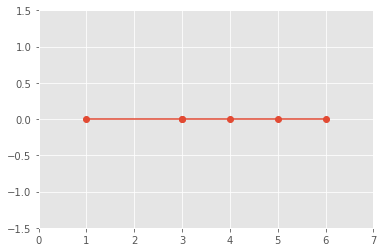

In [65]:
n = len(initial)//2
fig, ax = plt.subplots()
ax.axis([0, n+3, -1.5, 1.5])
point, = ax.plot([], [], marker='o')
x1 = np.array(range(1, n + 3))
y = [0]*(n+2)
def update(t):
    x = x1 + np.append(np.insert(p2[t][:n], 0, 0), 0)
    point.set_data(x, y)
    return point,

res = FuncAnimation(fig, update, interval=1, frames=range(len(p1)), repeat=True, blit=True)
plt.show()

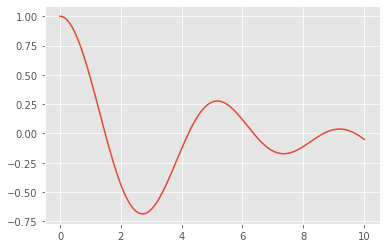

In [98]:
plt.plot(p1, np.array(p2)[:, 0])
plt.show()

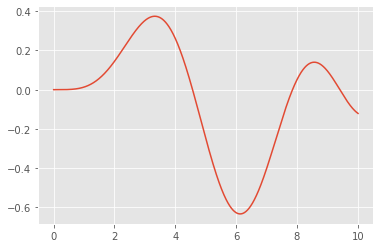

In [99]:
plt.plot(p1, np.array(p2)[:, 2])
plt.show()